In [1]:
import pandas as pd
import re
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
dir_name = 'drive/My Drive/Colab Notebooks/Netflix/data'

In [4]:
netflix=pd.read_csv('netflix_titles.csv')

In [5]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
netflix.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
netflix.duplicated().sum()

np.int64(0)

In [10]:
netflix.shape

(8807, 12)

Text(0.5, 1.0, 'Type')

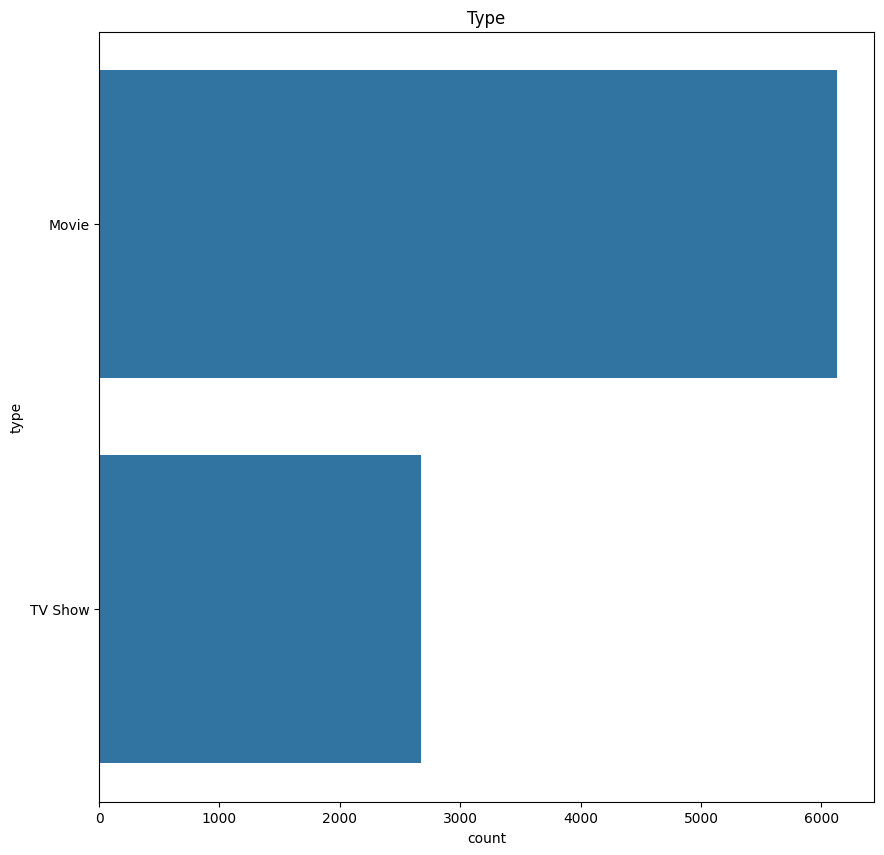

In [11]:
sns.countplot(netflix['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

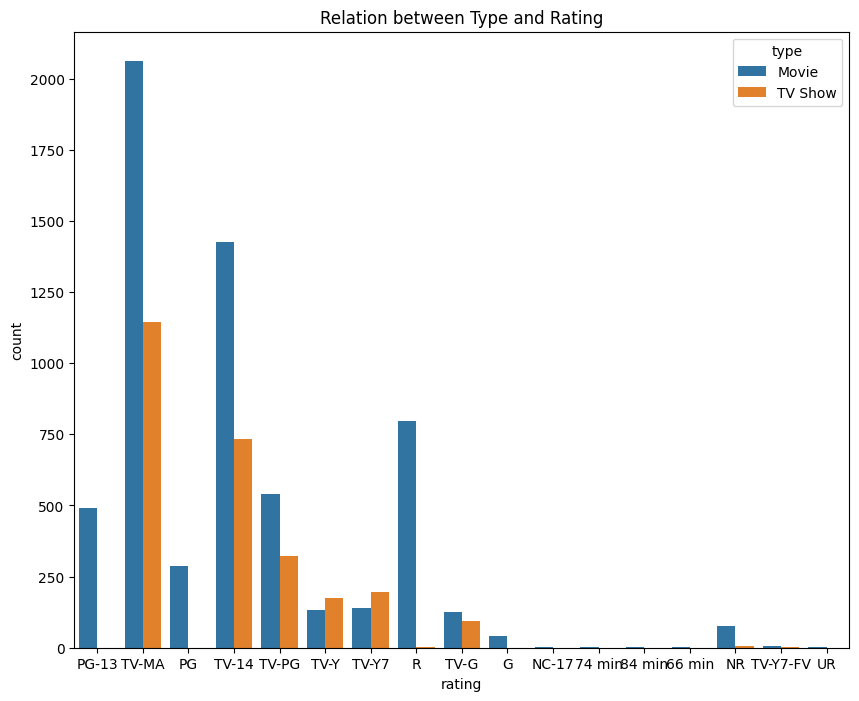

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

In [17]:
import plotly.express as px
df = px.data.wind()
fig = px.sunburst(df,
path=['direction', 'strength'],
values='frequency',
color='frequency')
fig.show()

<ipython-input-26-1a5c70e803a7>:94: UserWarning:

Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.

<ipython-input-26-1a5c70e803a7>:94: UserWarning:

Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.

<ipython-input-26-1a5c70e803a7>:94: UserWarning:

Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.

<ipython-input-26-1a5c70e803a7>:94: UserWarning:

Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.

<ipython-input-26-1a5c70e803a7>:94: UserWarning:

Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.

<ipython-input-26-1a5c70e803a7>:94: UserWarning:

Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.

<ipython-input-26-1a5c70e803a7>:94: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/di

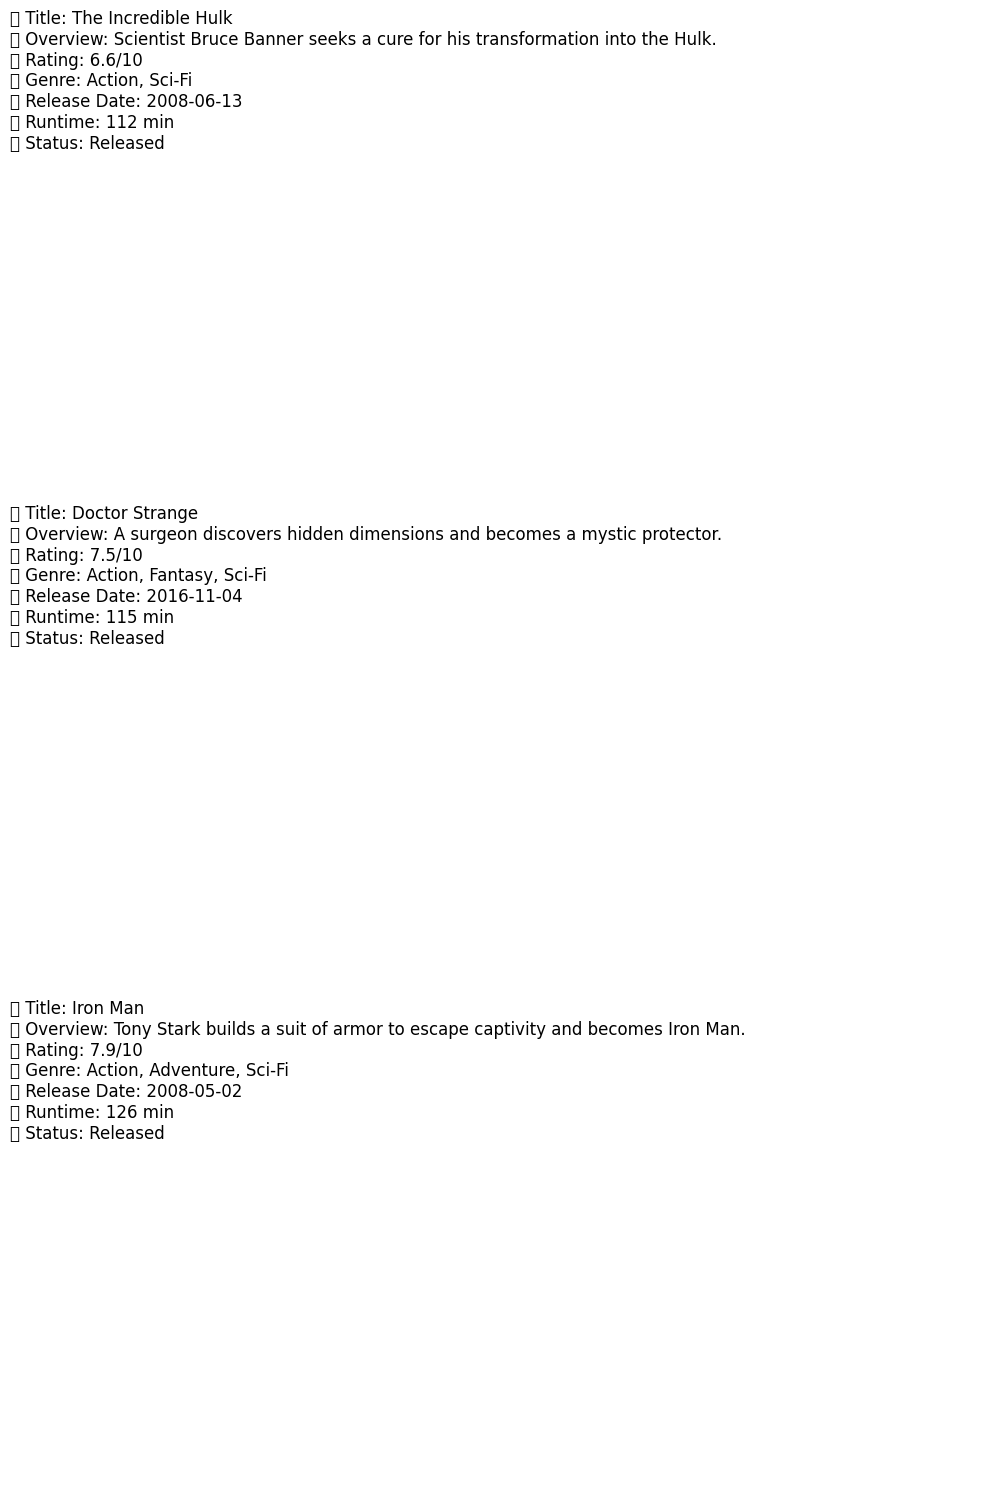

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Sample movie metadata
movies = pd.DataFrame([
    {
        'title': 'Hulk',
        'overview': 'Bruce Banner transforms into a giant green monster when angered.',
        'genre': 'Action, Sci-Fi',
        'release_date': '2003-06-20',
        'rating': 5.6,
        'runtime': 138,
        'status': 'Released'
    },
    {
        'title': 'The Incredible Hulk',
        'overview': 'Scientist Bruce Banner seeks a cure for his transformation into the Hulk.',
        'genre': 'Action, Sci-Fi',
        'release_date': '2008-06-13',
        'rating': 6.6,
        'runtime': 112,
        'status': 'Released'
    },
    {
        'title': 'Iron Man',
        'overview': 'Tony Stark builds a suit of armor to escape captivity and becomes Iron Man.',
        'genre': 'Action, Adventure, Sci-Fi',
        'release_date': '2008-05-02',
        'rating': 7.9,
        'runtime': 126,
        'status': 'Released'
    },
    {
        'title': 'Thor',
        'overview': 'The powerful but arrogant god Thor is cast out of Asgard.',
        'genre': 'Action, Fantasy, Adventure',
        'release_date': '2011-05-06',
        'rating': 7.0,
        'runtime': 115,
        'status': 'Released'
    },
    {
        'title': 'Doctor Strange',
        'overview': 'A surgeon discovers hidden dimensions and becomes a mystic protector.',
        'genre': 'Action, Fantasy, Sci-Fi',
        'release_date': '2016-11-04',
        'rating': 7.5,
        'runtime': 115,
        'status': 'Released'
    }
])

# Combine relevant text features
movies['content'] = movies['overview'] + ' ' + movies['genre']

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(movies['content'])

# Compute similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get similar movies to "Hulk"
def get_recommendations(title, num_recommendations=3):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return movies.iloc[movie_indices]

# Get recommendations for Hulk
recommendations = get_recommendations("Hulk", 3)

# Plotting the recommendations
def show_recommendations(recs):
    fig, axs = plt.subplots(len(recs), 1, figsize=(10, 5 * len(recs)))
    if len(recs) == 1:
        axs = [axs]
    for i, (_, row) in enumerate(recs.iterrows()):
        info = (
            f"🎬 Title: {row['title']}\n"
            f"📝 Overview: {row['overview']}\n"
            f"⭐ Rating: {row['rating']}/10\n"
            f"🎭 Genre: {row['genre']}\n"
            f"📅 Release Date: {row['release_date']}\n"
            f"⏱ Runtime: {row['runtime']} min\n"
            f"✅ Status: {row['status']}"
        )
        axs[i].axis('off')
        axs[i].text(0, 1, info, fontsize=12, va='top', wrap=True)

    plt.tight_layout()
    plt.show()

# Show results
show_recommendations(recommendations)


In [34]:
df_title = pd.read_csv('netflix_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])
df_title.set_index('Movie_Id', inplace = True)
print (df_title.head(10))

                                                        Year  \
Movie_Id                                                       
duration                                           listed_in   
90 min                                         Documentaries   
2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
1 Season   Crime TV Shows, International TV Shows, TV Act...   
1 Season                              Docuseries, Reality TV   
2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
1 Season                  TV Dramas, TV Horror, TV Mysteries   
91 min                              Children & Family Movies   
125 min     Dramas, Independent Movies, International Movies   
9 Seasons                       British TV Shows, Reality TV   

                                                        Name  
Movie_Id                                                      
duration                                         description  
90 min     As her father nears the end of 

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

<ipython-input-38-32d102ade609>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




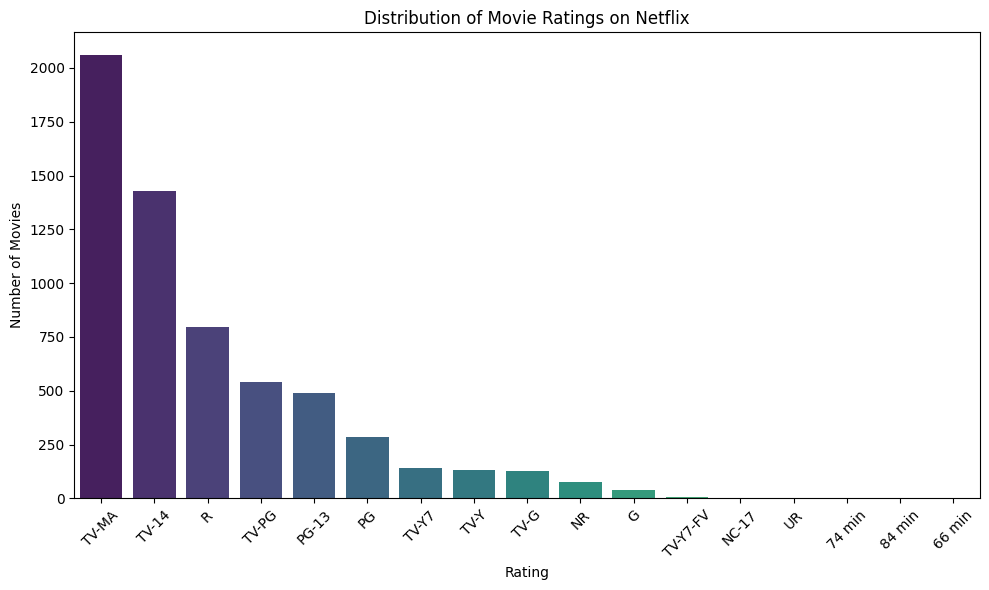

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Show first few rows
print(df.head())

# Filter only movies
movies_df = df[df['type'] == 'Movie']

# Drop rows with missing ratings
movies_df = movies_df.dropna(subset=['rating'])

# Count of each rating
rating_counts = movies_df['rating'].value_counts().sort_values(ascending=False)

# Display rating counts
print("Rating Counts:\n", rating_counts)

# Plot the ratings
plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Movie Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
import plotly.express as px
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()